In [ ]:
!pip install tensorflow

In [102]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [61]:
# Importing libraries and loading the dataset
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [62]:
# Inspecting the shape of the dataset
print("X_train shape:", X_train.shape)   # (50000, 32, 32, 3)
print("X_test shape:",  X_test.shape)    # (10000, 32, 32, 3)
print("y_train shape:", y_train.shape)   # (50000, 1)
print("y_test shape:",  y_test.shape)    # (10000, 1)
# Inspecting data types
print("X dtype:", X_train.dtype)
print("y dtype:", y_train.dtype)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
X dtype: uint8
y dtype: uint8


In [63]:
# Inspecting classes distribution
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
# Unique label values
print("Unique labels:", np.unique(y_train))
# Flatten y to 1D for convenience
y_train_flat = y_train.ravel()
y_test_flat  = y_test.ravel()

import collections
train_counts = collections.Counter(y_train_flat)
test_counts  = collections.Counter(y_test_flat)
print("Train counts per class:")
for i, name in enumerate(class_names):
    print(f"{i} - {name:10s}: {train_counts[i]}")
print("\nTest counts per class:")
for i, name in enumerate(class_names):
    print(f"{i} - {name:10s}: {test_counts[i]}")

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Train counts per class:
0 - airplane  : 5000
1 - automobile: 5000
2 - bird      : 5000
3 - cat       : 5000
4 - deer      : 5000
5 - dog       : 5000
6 - frog      : 5000
7 - horse     : 5000
8 - ship      : 5000
9 - truck     : 5000

Test counts per class:
0 - airplane  : 1000
1 - automobile: 1000
2 - bird      : 1000
3 - cat       : 1000
4 - deer      : 1000
5 - dog       : 1000
6 - frog      : 1000
7 - horse     : 1000
8 - ship      : 1000
9 - truck     : 1000


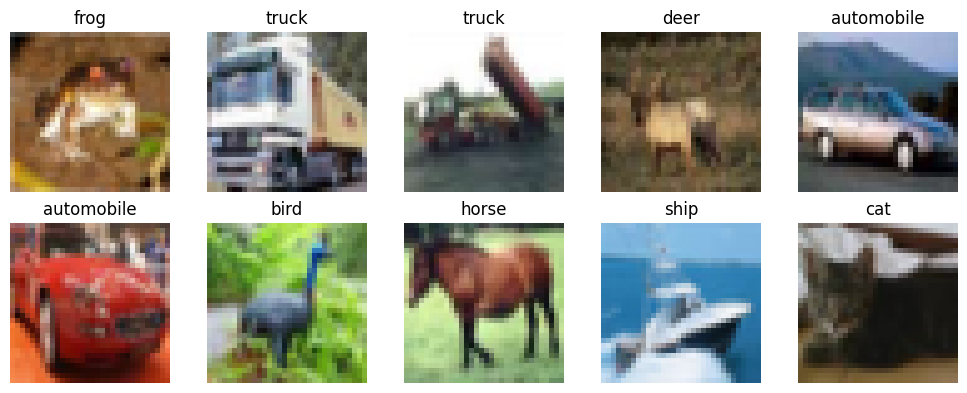

In [64]:
# A few sample images with labels
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train_flat[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

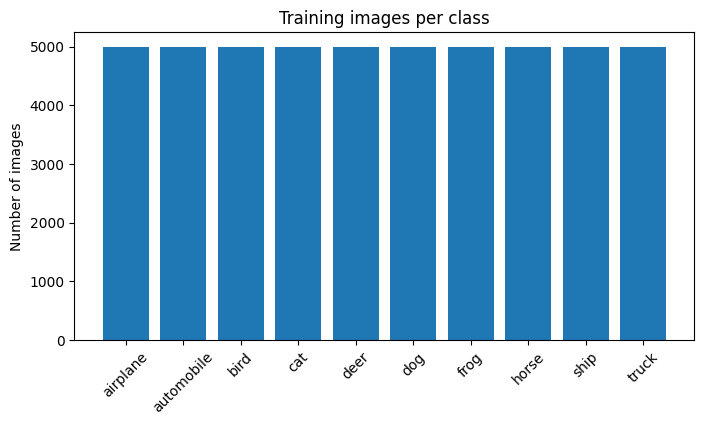

In [65]:
# Bar plot of images per class
plt.figure(figsize=(8,4))
counts = [train_counts[i] for i in range(10)]
plt.bar(class_names, counts)
plt.xticks(rotation=45)
plt.ylabel("Number of images")
plt.title("Training images per class")
plt.show()

In [66]:
# Checking for obvious data issues
print("Any NaNs in X_train?", np.isnan(X_train).any())
print("Any NaNs in X_test?",  np.isnan(X_test).any())
print("Any NaNs in y_train?", np.isnan(y_train).any())
print("Any NaNs in y_test?",  np.isnan(y_test).any())

Any NaNs in X_train? False
Any NaNs in X_test? False
Any NaNs in y_train? False
Any NaNs in y_test? False


We explored the dataset. This is a keras dataset cifar, consisting of 60,000 images and its classifications labels (0-9). These are 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. The dataset is split to training data consisting of 50,000 images and to testing data containing of 10,000 images. Images are RGB images of 32x32 pixels. The classes in the dataset are perfectly distributed, with 5,000 images per each class.

In [67]:
# Step 3: Preprocess the data
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Normalization complete!")

Normalization complete!


In [69]:
# Building the initial model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_0 = Sequential([
    Conv2D(32, (3,3), activation='relu',
    input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    # Dropout(0.2),  # optional

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    # Dropout(0.2),  # optional

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Print model summary to verify
model_0.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Compiling and training the model
model_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting training...")
history_0 = model_0.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# model_0 evaluation
test_loss, test_accuracy = model_0.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

Starting training...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8662 - loss: 0.3749 - val_accuracy: 0.6885 - val_loss: 1.0715
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8907 - loss: 0.3167 - val_accuracy: 0.6839 - val_loss: 1.2118
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9045 - loss: 0.2751 - val_accuracy: 0.6859 - val_loss: 1.2564
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9242 - loss: 0.2216 - val_accuracy: 0.6824 - val_loss: 1.3367
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9333 - loss: 0.1943 - val_accuracy: 0.6787 - val_loss: 1.4839
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9401 - loss: 0.1720 - val_accuracy: 0.6714 - val_loss: 1.5940
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9520 - loss: 0.1430 - val_accuracy: 0.6809 - val_loss: 1.6868
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9

The first model is a basic model, with 2 convolution and pooling layers. The model performs poorly: test accuracy 0.70, test loss 1.01

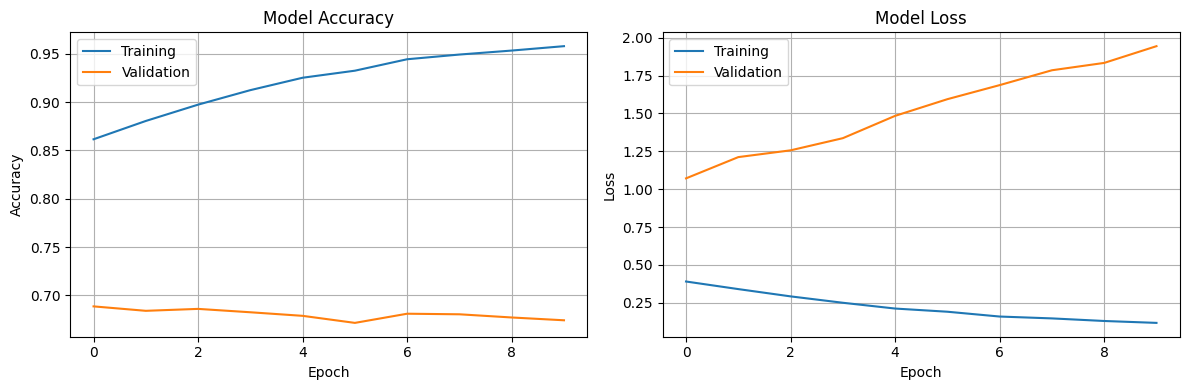

In [80]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_0.history['accuracy'], label='Training')
plt.plot(history_0.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_0.history['loss'], label='Training')
plt.plot(history_0.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Initial Model Performance Issues**
The initial shallow CNN model demonstrated three critical problems:  
- Low accuracy (~60-70% on validation set)  
- High loss indicating poor prediction confidence  
- Overfitting - training accuracy significantly higher than validation accuracy, suggesting the model was memorizing rather than learning generalizable patterns

These results indicated that the model lacked sufficient capacity and architectural sophistication to capture the complexity of CIFAR-10 images. A fundamental redesign was necessary.

**Architectural Improvements: Rationale**
The new model incorporates several key design principles proven effective for image classification tasks:
1. Deeper Architecture with Convolutional Blocks  
**Block structure:** Conv → Conv → Pool → Dropout
- Rationale: Stacking two convolutional layers before pooling allows hierarchical feature learning  
First conv layer extracts basic features (edges, textures)  
Second conv layer combines these into more complex patterns (shapes, object parts)  
This approach is inspired by VGG architecture, which demonstrated that **depth improves performance more than wider filters**

2. Padding Strategy: padding='same'  
Conv2D(32, (3,3), activation='relu', padding='same')  
- Rationale: Preserves spatial dimensions throughout each block (32×32 → 32×32 instead of 32×32 → 30×30)  
Retains information from image borders, which often contains important context  
Enables deeper networks without prematurely losing spatial resolution  
Ensures consistent feature map sizes for better gradient flow

3. Progressive Filter Depth: 32 → 64 → 128  
Block 1: 32 filters  (low-level features)  
Block 2: 64 filters  (mid-level patterns)  
Block 3: 128 filters (high-level representations)  
- Rationale:  
Early layers need fewer filters to capture universal low-level features (edges, colors, basic textures)  
Deeper layers require more filters to represent increasingly complex and class-specific patterns  
Doubling filters after pooling is a standard practice that balances model capacity with computational efficiency  
Creates a feature pyramid: spatial dimensions decrease while feature depth increases

4. Strategic Dropout Regularization  
Dropout(0.25)  # After pooling layers  
Dropout(0.2)   # Before final classification  
- Rationale:  
Prevents overfitting by randomly deactivating 20-25% of neurons during training  
Forces the network to learn robust, redundant representations rather than memorizing training data  
Placed after pooling layers and in the classifier for maximum regularization effect  
Essential for CIFAR-10's relatively small dataset (50,000 training images)  

5. Controlled Spatial Downsampling
Conv → Conv → MaxPool (32×32 → 16×16)  
Conv → Conv → MaxPool (16×16 → 8×8)  
Conv → MaxPool (8×8 → 4×4)  
- Rationale:  
Extracts rich features at each spatial resolution before downsampling  
Prevents premature information loss that occurred in the shallow model  
Mimics the hierarchical processing of the human visual system  
Provides the network with sufficient computational budget at each scale

6. Increased Classifier Capacity  
Dense(128, activation='relu')  
- Rationale:  
After three pooling stages, the network produces 4×4×128 = 2,048 features  
A 128-unit dense layer provides sufficient capacity to integrate these features into class decisions  
Balances expressiveness with computational efficiency and overfitting risk  
- Design Philosophy: Feature Pyramid Architecture  
The model follows a "pyramid" structure where:  
Spatial dimensions shrink progressively (32×32 → 16×16 → 8×8 → 4×4)  
Feature depth grows systematically (3 channels → 32 → 64 → 128 filters)  
Information is compressed hierarchically from raw pixels to class-specific representations   

This design enables the network to:  
Capture low-level features at high resolution   
Build mid-level patterns at intermediate resolution  
Form high-level semantic concepts at low resolution  
Integrate all information for final classification

Expected Performance Improvements
This architecture addresses all three problems of the initial model:  
Higher accuracy through increased representational capacity and hierarchical feature learning  
Lower loss via better gradient flow from padding and systematic depth  
Reduced overfitting through dropout regularization and architectural inductive biases  
The combination of these design choices creates a robust CNN suitable for the complexity of CIFAR-10's 10-class image classification task.

In [81]:
model_1 = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_1 = model_1.fit(
    X_train, y_train,
    epochs=20,  # More epochs
    batch_size=32,
    validation_split=0.2
)

test_loss, test_accuracy = model_1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3005 - loss: 1.8686 - val_accuracy: 0.5424 - val_loss: 1.2711
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5581 - loss: 1.2306 - val_accuracy: 0.6581 - val_loss: 0.9652
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6335 - loss: 1.0284 - val_accuracy: 0.6857 - val_loss: 0.8745
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6821 - loss: 0.9000 - val_accuracy: 0.7114 - val_loss: 0.8009
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7111 - loss: 0.8261 - val_accuracy: 0.7262 - val_loss: 0.7702
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7248 - loss: 0.7761 - val_accuracy: 0.7518 - val_loss: 0.7129
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7441 - loss: 0.7207 - val_accuracy: 0.7229 - val_loss: 0.8017
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7529 - loss: 0.6982 

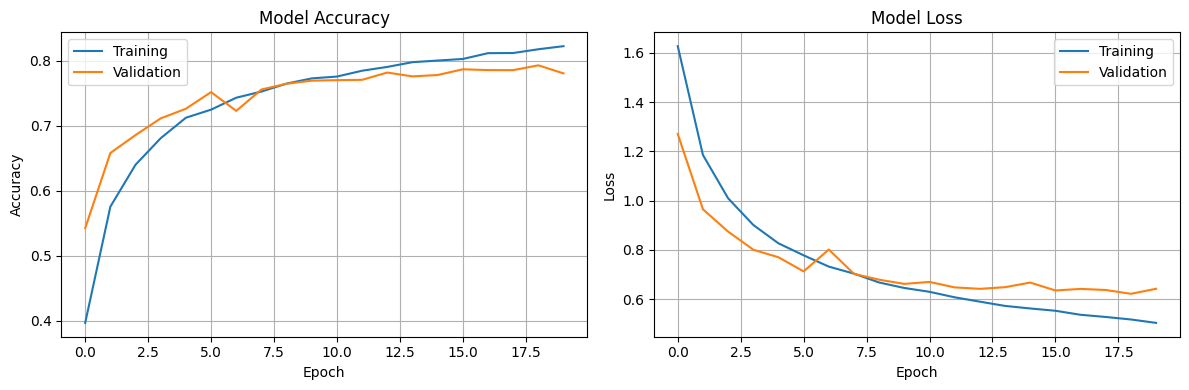

In [82]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training')
plt.plot(history_1.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Training')
plt.plot(history_1.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The model has improved significantly :  
Test accuracy: 0.7761
Test loss: 0.6784
the overfitting has been greatly reduced.  
The graph shows that the model is still learning. Therefore we could improve the model hyperparameters:
- Epochs and batch size
- Learning rate
- Include one more block preserving the same architecture


In [83]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    # 1) Save the best model (based on validation loss)
    ModelCheckpoint(
        filepath="best_model.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
        verbose=1
    ),
    # 2) Stop training if validation loss doesn't improve
    EarlyStopping(
        monitor="val_loss",
        mode="min",
        patience=5,
        restore_best_weights=True,  # restores best weights when EarlyStopping triggers
        verbose=1
    ),
    # 3) Reduce LR when progress stalls (helps on the plateau)
    ReduceLROnPlateau(
        monitor="val_loss",
        mode="min",
        factor=0.5,     # halve the LR
        patience=2,     # wait 2 epochs without improvement
        min_lr=1e-6,
        verbose=1
    )
]
history_2 = model_1.fit(
    X_train, y_train,
    epochs=50,              # set high; callbacks will stop earlier if needed
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)
test_loss, test_accuracy = model_1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

Epoch 1/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8251 - loss: 0.4868
Epoch 1: val_loss improved from inf to 0.65253, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8251 - loss: 0.4868 - val_accuracy: 0.7850 - val_loss: 0.6525 - learning_rate: 0.0010
Epoch 2/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8303 - loss: 0.4748
Epoch 2: val_loss improved from 0.65253 to 0.61866, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8303 - loss: 0.4748 - val_accuracy: 0.7903 - val_loss: 0.6187 - learning_rate: 0.0010
Epoch 3/50
1239/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8381 - loss: 0.4598
Epoch 3: val_loss did not improve from 0.61866
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8380 - loss: 0.4600 - val_accuracy: 0.7867 - val_loss: 0.6512 - learning_rate: 0.0010
Epoch 4/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8392 - loss: 0.4543
Epoch 

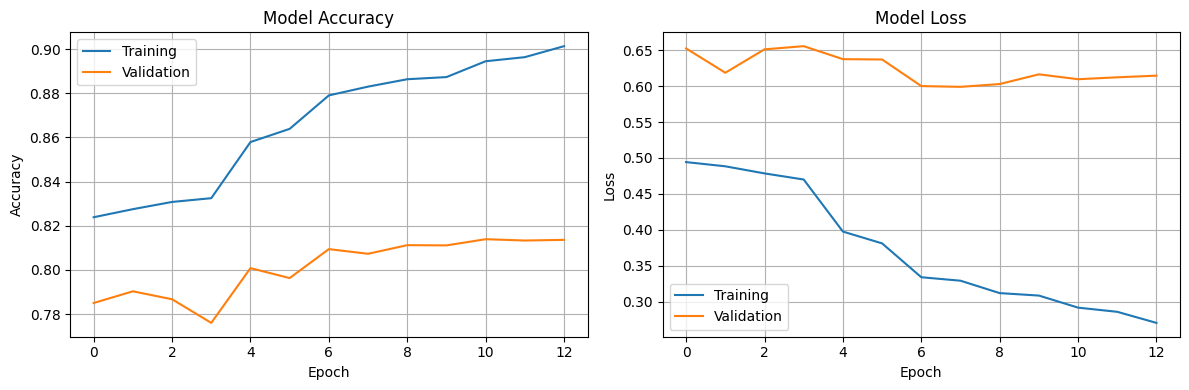

In [85]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training')
plt.plot(history_2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

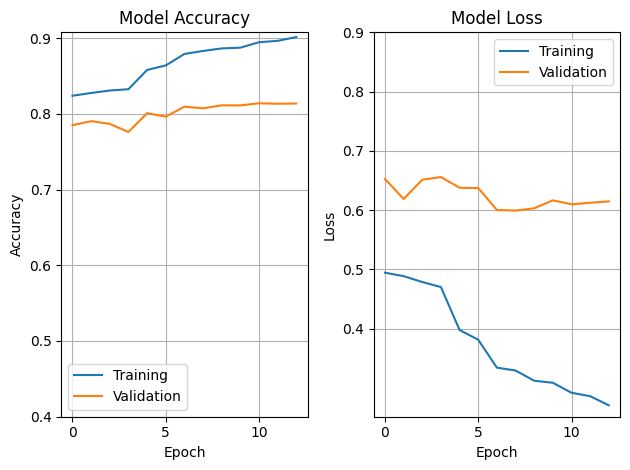

In [96]:
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training')
plt.plot(history_2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.yticks(np.arange(0.4, 1.0, 0.1))  # y-axis from 0 to 1 with 0.1 intervals
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.yticks(np.arange(0.4, 1.0, 0.1))  # y-axis from 0 to 1 with 0.1 intervals
plt.tight_layout()
plt.show()

In [103]:
# Setup data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
# Train model using data augmentation
history_aug = model_1.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test)
)
# Evaluate
loss_aug, accuracy_aug = model_1.evaluate(X_test, y_test)
print(f"Test accuracy with data augmentation: {accuracy_aug:.4f}")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.7190 - loss: 0.8837 - val_accuracy: 0.7806 - val_loss: 0.6701
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7308 - loss: 0.7944 - val_accuracy: 0.7721 - val_loss: 0.6909
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7366 - loss: 0.7761 - val_accuracy: 0.7784 - val_loss: 0.6786
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7379 - loss: 0.7689 - val_accuracy: 0.7745 - val_loss: 0.6844
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7373 - loss: 0.7665 - val_accuracy: 0.7765 - val_loss: 0.6754
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7397 - loss: 0.7538 - val_accuracy: 0.7745 - val_loss: 0.6840
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7447 - loss: 0.7438 - val_accuracy: 0.7797 - val_loss: 0.6652
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7445 - loss: 0.7370 - val_accurac

In [105]:
test_loss, test_accuracy = model_1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7878 - loss: 0.6530
Test accuracy: 0.7823
Test loss: 0.6606


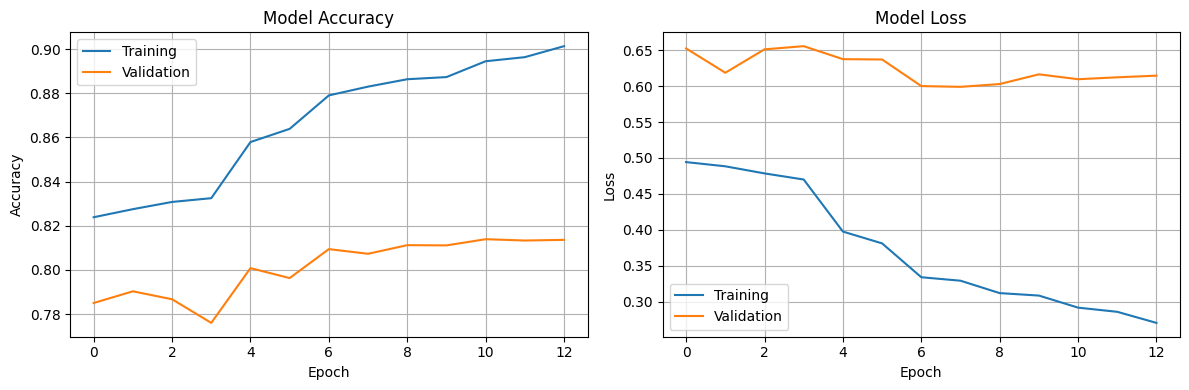

In [106]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training')
plt.plot(history_2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [104]:
test_loss, test_accuracy = model_1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7878 - loss: 0.6530
Test accuracy: 0.7823
Test loss: 0.6606
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.5957
Test accuracy: 0.7944
Test loss: 0.6050


In [98]:
test_loss1, test_acc1 = model_1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model_2.evaluate(X_test, y_test)

print("Modelo 1 accuracy:", test_acc1)
print("Modelo 2 accuracy:", test_acc2)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8074 - loss: 0.6149
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7921 - loss: 0.6189
Modelo 1 accuracy: 0.800599992275238
Modelo 2 accuracy: 0.7885000109672546


In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred1 = np.argmax(model_1.predict(X_test), axis=1)
y_pred2 = np.argmax(model_2.predict(X_test), axis=1)

print("Modelo 1:")
print(classification_report(y_test, y_pred1))

print("Modelo 2:")
print(classification_report(y_test, y_pred2))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Modelo 1:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.92      0.91      0.91      1000
           2       0.72      0.68      0.70      1000
           3       0.66      0.59      0.62      1000
           4       0.77      0.78      0.77      1000
           5       0.70      0.73      0.71      1000
           6       0.80      0.88      0.84      1000
           7       0.84      0.85      0.85      1000
           8       0.88      0.89      0.89      1000
           9       0.88      0.88      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Modelo 2:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.89      0

Model 2, a deeper CNN with multiple convolutional layers and dropout, achieves significantly better performance (78% accuracy) compared to Model 1 (61%).
This demonstrates that deeper architectures are able to capture more complex visual features from the CIFAR-10 dataset, especially in challenging classes such as cats, dogs, and deer. In addition, techniques like Dropout and Batch Normalization help reduce overfitting and stabilize the training process


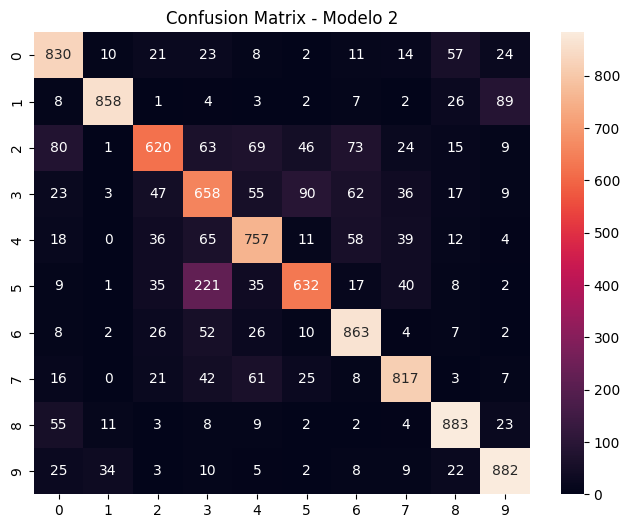

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Matrix Confusion - Modelo 2")
plt.show()


The confusion matrix shows that our model correctly classifies most images, particularly those from vehicle categories such as automobile, ship, and truck. However, there are notable misclassifications among animal classes like cat, dog, and bird, which is common in CIFAR-10 due to their visual similarity. Model 2 generalizes much better than Model 1, achieving higher values along the diagonal and fewer errors off the diagonal